### Code: Maps at mazana level - Lima Metropolitana

### Author: Roberto Mendoza

### Date: 01/05/2022

### updated date: 30/03/2022


In [1]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 75%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 75%; }a
</style>
"""))

In [1]:
#pip install seaborn

In [2]:
#pip install chardet

In [2]:
# import package pandas, geopandas, plots

import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet
import os
import seaborn as sns

import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString, Polygon


import contextily as cx  # import street map
#from pyproj import CRS

### create new conda environment to load contextily and geopandas packages

- conda install -c conda-forge geopandas
- conda install -c conda-forge contextily

# 1. Joing shapefile by each district from Lima Metropolitana

In [3]:
# selecting distric

district = ['ATE','BARRANCO','BREÑA', 'CALLAO', 'CARABAYLLO','CHORRILLOS','COMAS','EL_AGUSTINO','INDEPENDENCIA',
           'JESUS_MARIA','LA_MOLINA_LIMA','LA_VICTORIA','LIMA','LINCE','LOS_OLIVOS_LIMA','MAGDALENA_DEL_MAR',
           'MIRAFLORES','PUEBLO_LIBRE','PUENTE_PIEDRA', 'RIMAC_LIMA','SAN_BORJA','SAN_ISIDRO','SAN_JUAN_DE_LURIGANCHO','SAN_JUAN_DE_MIRAFLORES','SAN_LUIS',
            'SAN_MARTIN_DE_PORRES','SAN_MIGUEL','SANTA_ANITA','SURCO','VILLA_EL_SALVADOR','VILLA_MARIA_DEL_TRIUNFO']



In [4]:
#maps  = gpd.read_file(r"..\Poverty_map\5_Informacion_Cartografica-Shape\Lima\LIMA.shp")

data_files = r"../../data/geopandas_data/5_Informacion_Cartografica-Shape/"
 

i = 0

for j in district:
        i = i + 1
        globals()[f'manzana{i}']  = gpd.read_file(f'{data_files}{j}/{j}.shp')
        globals()[f'manzana{i}']  = globals()[f'manzana{i}'][['Mz','geometry','UBIGEO']]
        globals()[f'manzana{i}']  = globals()[f'manzana{i}'].rename(columns = {"Mz":"id_manzana"})

        
       
        
Fmapa = manzana1.copy()

for k in range(2,i+1):
    Fmapa = Fmapa.append(globals()[f'manzana{k}'] , ignore_index=True)



C:\Users\Roberto\AppData\Local\Temp\ipykernel_17584\1320527409.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Fmapa = Fmapa.append(globals()[f'manzana{k}'] , ignore_index=True)
C:\Users\Roberto\AppData\Local\Temp\ipykernel_17584\1320527409.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Fmapa = Fmapa.append(globals()[f'manzana{k}'] , ignore_index=True)
C:\Users\Roberto\AppData\Local\Temp\ipykernel_17584\1320527409.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Fmapa = Fmapa.append(globals()[f'manzana{k}'] , ignore_index=True)
C:\Users\Roberto\AppData\Local\Temp\ipykernel_17584\1320527409.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

In [5]:
Fmapa.shape

(87859, 3)

In [6]:
#Fmapa
Fmapa['bool_series'] = Fmapa.duplicated(["id_manzana"])

In [7]:
# 670 duplicates id_manzana that share same coordinates, hence I dropped repeated 
Fmapa[Fmapa['bool_series'] == 1]
Fmapa = Fmapa[Fmapa['bool_series'] == 0]
Fmapa

,id_manzana,geometry,UBIGEO,bool_series
0,150103000108200012,"POLYGON ((-76.82197 -12.03291, -76.82177 -12.0...",150103,False
1,150103000104101040,"POLYGON ((-76.89112 -12.02548, -76.89111 -12.0...",150103,False
2,150103000101800006,"POLYGON ((-76.91978 -12.04229, -76.91966 -12.0...",150103,False
3,150103000102900018,"POLYGON ((-76.92292 -12.02466, -76.92240 -12.0...",150103,False
4,150103000103800056,"POLYGON ((-76.89258 -12.03403, -76.89291 -12.0...",150103,False
...,...,...,...,...
87854,150143000103400036D,"POLYGON ((-76.93692 -12.16901, -76.93692 -12.1...",150143,False
87855,150143000104600043L,"POLYGON ((-76.91812 -12.16638, -76.91813 -12.1...",150143,False
87856,150143000106800020,"POLYGON ((-76.91389 -12.20689, -76.91403 -12.2...",150143,False
87857,150143000108000026,"POLYGON ((-76.90854 -12.22466, -76.90858 -12.2...",150143,False


In [8]:
#import pyreadr

manzana_data = pd.read_stata(r'../../data/geopandas_data/data_manzana_2017.dta')

In [9]:
manzana_data

,id_manzana,UBIGEO,var1_2017,var2_2017,var3_2017,var4_2017,var5_2017,var6_2017,var7_2017,var8_2017,var9_2017
0,150101000100100001,150101,52.0,30.0,138.0,37.681159,21.739130,22.0,7.0,15.942029,5.072464
1,150101000100100003,150101,6.0,9.0,39.0,15.384615,23.076923,5.0,4.0,12.820513,10.256410
2,150101000100100004,150101,48.0,48.0,194.0,24.742268,24.742268,20.0,41.0,10.309278,21.134021
3,150101000100100005,150101,39.0,79.0,298.0,13.087248,26.510067,23.0,42.0,7.718121,14.093960
4,150101000100100007,150101,47.0,37.0,215.0,21.860465,17.209302,26.0,23.0,12.093023,10.697674
...,...,...,...,...,...,...,...,...,...,...,...
69635,070107000100900049F,070107,6.0,8.0,18.0,33.333333,44.444444,1.0,0.0,5.555556,0.000000
69636,070107000100900049G,070107,16.0,22.0,46.0,34.782609,47.826087,0.0,1.0,0.000000,2.173913
69637,070107000100900069B,070107,4.0,10.0,22.0,18.181818,45.454545,0.0,1.0,0.000000,4.545455
69638,070107000100900069E,070107,8.0,24.0,37.0,21.621622,64.864865,1.0,2.0,2.702703,5.405405


In [10]:
base_map_manzana = pd.merge(manzana_data, Fmapa , how = "inner" , on =["UBIGEO","id_manzana"])

In [11]:
# 97.8% from Censo's observation is matched to cartography data
# in abolsute terms, 2 000 manzanas from Censo were not matched

base_map_manzana 

,id_manzana,UBIGEO,var1_2017,var2_2017,var3_2017,var4_2017,var5_2017,var6_2017,var7_2017,var8_2017,var9_2017,geometry,bool_series
0,150101000100100001,150101,52.0,30.0,138.0,37.681159,21.739130,22.0,7.0,15.942029,5.072464,"POLYGON ((-77.08219 -12.03661, -77.08295 -12.0...",False
1,150101000100100003,150101,6.0,9.0,39.0,15.384615,23.076923,5.0,4.0,12.820513,10.256410,"POLYGON ((-77.08014 -12.03582, -77.07995 -12.0...",False
2,150101000100100004,150101,48.0,48.0,194.0,24.742268,24.742268,20.0,41.0,10.309278,21.134021,"POLYGON ((-77.07790 -12.03652, -77.07863 -12.0...",False
3,150101000100100005,150101,39.0,79.0,298.0,13.087248,26.510067,23.0,42.0,7.718121,14.093960,"POLYGON ((-77.07976 -12.03641, -77.07886 -12.0...",False
4,150101000100100007,150101,47.0,37.0,215.0,21.860465,17.209302,26.0,23.0,12.093023,10.697674,"POLYGON ((-77.08185 -12.03681, -77.08094 -12.0...",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61897,070107000100900049F,070107,6.0,8.0,18.0,33.333333,44.444444,1.0,0.0,5.555556,0.000000,"POLYGON ((-77.11432 -11.85839, -77.11444 -11.8...",False
61898,070107000100900049G,070107,16.0,22.0,46.0,34.782609,47.826087,0.0,1.0,0.000000,2.173913,"POLYGON ((-77.11475 -11.85829, -77.11491 -11.8...",False
61899,070107000100900069B,070107,4.0,10.0,22.0,18.181818,45.454545,0.0,1.0,0.000000,4.545455,"POLYGON ((-77.11343 -11.85262, -77.11339 -11.8...",False
61900,070107000100900069E,070107,8.0,24.0,37.0,21.621622,64.864865,1.0,2.0,2.702703,5.405405,"POLYGON ((-77.11317 -11.85356, -77.11327 -11.8...",False


In [12]:
# from Data.Frame to Geo.DataFrame 

MAP = gpd.GeoDataFrame(base_map_manzana, geometry='geometry')

In [13]:
MAP['centroid'] = MAP['geometry'].centroid
#Extract lat and lon from the centerpoint
MAP["lat"] = MAP.centroid.map(lambda p: p.x)
MAP["long"] = MAP.centroid.map(lambda p: p.y)

C:\Users\Roberto\AppData\Local\Temp\ipykernel_17584\3844988510.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  MAP['centroid'] = MAP['geometry'].centroid
C:\Users\Roberto\AppData\Local\Temp\ipykernel_17584\3844988510.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  MAP["lat"] = MAP.centroid.map(lambda p: p.x)
C:\Users\Roberto\AppData\Local\Temp\ipykernel_17584\3844988510.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  MAP["long"] = MAP.centroid.map(lambda p: p.y)


# 2. Map 1 - Población con Educ Superior Completa/Poblacion > = 15 años + Google Maps de Lima

In [19]:
MAP.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [20]:
MAP

,id_manzana,UBIGEO,var1_2017,var2_2017,var3_2017,var4_2017,var5_2017,var6_2017,var7_2017,var8_2017,var9_2017,geometry,bool_series,centroid,lat,long
0,150101000100100001,150101,52.0,30.0,138.0,37.681159,21.739130,22.0,7.0,15.942029,5.072464,"POLYGON ((-77.08219 -12.03661, -77.08295 -12.0...",False,POINT (-77.08258 -12.03651),-77.082584,-12.036511
1,150101000100100003,150101,6.0,9.0,39.0,15.384615,23.076923,5.0,4.0,12.820513,10.256410,"POLYGON ((-77.08014 -12.03582, -77.07995 -12.0...",False,POINT (-77.07973 -12.03596),-77.079727,-12.035964
2,150101000100100004,150101,48.0,48.0,194.0,24.742268,24.742268,20.0,41.0,10.309278,21.134021,"POLYGON ((-77.07790 -12.03652, -77.07863 -12.0...",False,POINT (-77.07824 -12.03635),-77.078239,-12.036348
3,150101000100100005,150101,39.0,79.0,298.0,13.087248,26.510067,23.0,42.0,7.718121,14.093960,"POLYGON ((-77.07976 -12.03641, -77.07886 -12.0...",False,POINT (-77.07929 -12.03655),-77.079290,-12.036550
4,150101000100100007,150101,47.0,37.0,215.0,21.860465,17.209302,26.0,23.0,12.093023,10.697674,"POLYGON ((-77.08185 -12.03681, -77.08094 -12.0...",False,POINT (-77.08137 -12.03694),-77.081369,-12.036943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61897,070107000100900049F,070107,6.0,8.0,18.0,33.333333,44.444444,1.0,0.0,5.555556,0.000000,"POLYGON ((-77.11432 -11.85839, -77.11444 -11.8...",False,POINT (-77.11460 -11.85818),-77.114600,-11.858184
61898,070107000100900049G,070107,16.0,22.0,46.0,34.782609,47.826087,0.0,1.0,0.000000,2.173913,"POLYGON ((-77.11475 -11.85829, -77.11491 -11.8...",False,POINT (-77.11501 -11.85797),-77.115010,-11.857970
61899,070107000100900069B,070107,4.0,10.0,22.0,18.181818,45.454545,0.0,1.0,0.000000,4.545455,"POLYGON ((-77.11343 -11.85262, -77.11339 -11.8...",False,POINT (-77.11348 -11.85297),-77.113480,-11.852974
61900,070107000100900069E,070107,8.0,24.0,37.0,21.621622,64.864865,1.0,2.0,2.702703,5.405405,"POLYGON ((-77.11317 -11.85356, -77.11327 -11.8...",False,POINT (-77.11302 -11.85319),-77.113021,-11.853186


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


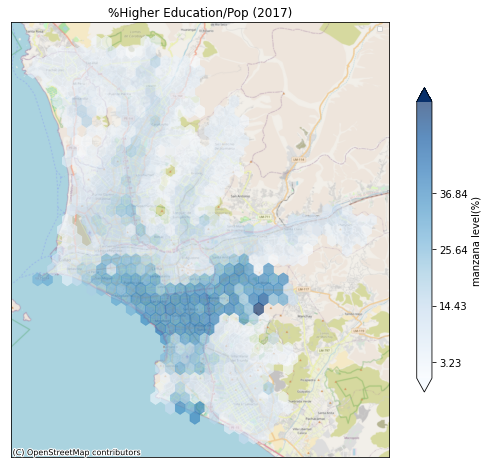

In [21]:
f, ax = plt.subplots(1, figsize=(10,8))

hb = ax.hexbin(MAP.lat, MAP.long, C = MAP.var9_2017, gridsize=35, alpha=0.65, linewidths = 0.5,cmap='Blues')

plt.colorbar(hb, shrink=0.7,anchor=(0, 0.5),label='manzana level(%)', ticks=np.linspace(MAP["var9_2017"].quantile(0.25),
                                                                                          MAP["var9_2017"].quantile(0.95),4), extend = "both")

# to add gool map 

cx.add_basemap(ax, crs="EPSG:4326", source=cx.providers.OpenStreetMap.Mapnik, zoom = 12)


plt.xticks([])
plt.yticks([])
plt.title('%Higher Education/Pop (2017)')
plt.legend(loc='upper right',frameon=True, bbox_to_anchor=(0.99, 1), prop={'size': 6.5})

#f.savefig(r'..\Output\figures\Edu_metro\Edu_metro_Map3.png', dpi=800, bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


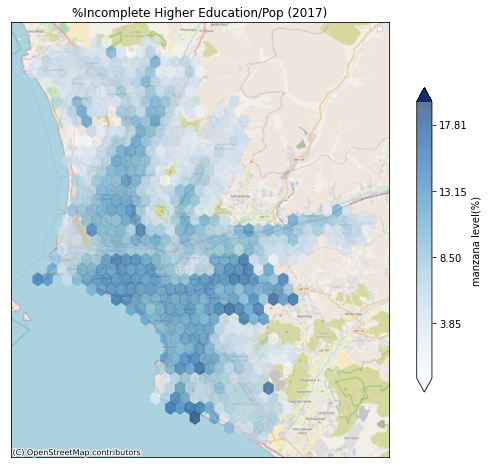

In [22]:
f, ax = plt.subplots(1, figsize=(10,8))

hb = ax.hexbin(MAP.lat, MAP.long, C = MAP.var8_2017, gridsize=35, alpha=0.65, linewidths = 0.5,cmap='Blues')

plt.colorbar(hb, shrink=0.7,anchor=(0, 0.5),label='manzana level(%)', ticks=np.linspace(MAP["var8_2017"].quantile(0.25),
                                                                                          MAP["var8_2017"].quantile(0.95),4), extend = "both")
cx.add_basemap(ax, crs="EPSG:4326", source=cx.providers.OpenStreetMap.Mapnik, zoom = 12)


plt.xticks([])
plt.yticks([])
plt.title('%Incomplete Higher Education/Pop (2017)')
plt.legend(loc='upper right',frameon=True, bbox_to_anchor=(0.99, 1), prop={'size': 6.5})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


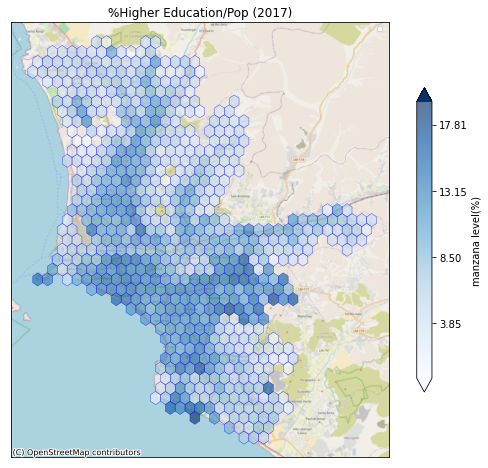

In [25]:
f, ax = plt.subplots(1, figsize=(10,8))

hb = ax.hexbin(MAP.lat, MAP.long, C = MAP.var8_2017, gridsize=35, alpha=0.65, linewidths = 0.5,
               zorder=0.8, edgecolors='blue',cmap='Blues')

plt.colorbar(hb, shrink=0.7,anchor=(0, 0.5),label='manzana level(%)', ticks=np.linspace(MAP["var8_2017"].quantile(0.25),
                                                                                          MAP["var8_2017"].quantile(0.95),4), extend = "both")


cx.add_basemap(ax, crs="EPSG:4326", source=cx.providers.OpenStreetMap.Mapnik, zoom = 12)


plt.xticks([])
plt.yticks([])
plt.title('%Higher Education/Pop (2017)')
plt.legend(loc='upper right',frameon=True, bbox_to_anchor=(0.99, 1), prop={'size': 6.5})

#f.savefig(r'..\Output\figures\Edu_metro\Edu_metro_Map3.png', dpi=800, bbox_inches='tight')

# References


https://geographicdata.science/book/notebooks/08_point_pattern_analysis.html